In [1]:
import os

import pandas as pd
import numpy as np

from os import path
import matplotlib.pyplot as plt
%matplotlib inline

from utils import word_cloud_utils # My helper functions

import importlib
importlib.reload(word_cloud_utils)

<module 'utils.word_cloud_utils' from 'C:\\Users\\Owner\\Documents\\UCSD Classes\\ECE 143 - Programming for Data Science\\utils\\word_cloud_utils.py'>

In [3]:
# Import text file containing all words that will not be considered for the word cloud
with open('other/my_stop_words.txt', 'r') as f:
    x = f.readlines()
    my_stop_words = list(x)
    my_stop_words = set( [word[:-1] for word in my_stop_words] ) # Removes the newline character from each word
    

In [5]:
# Import Trump outline image for making his word cloud
from PIL import Image 
size = 2000, 2000

trump_image = Image.open(path.join( "other/Trump_silhouette.png"))
trump_image.thumbnail(size, Image.ANTIALIAS)
trump_mask = np.array(trump_image)


In [6]:
# Import the tweet data
tweets = pd.read_csv("data/trump_tweets.csv", encoding = "mac_roman")
png_filename = None # set this if you want to save the image
image = trump_mask # set to trump_mask when creating word cloud for trump

tweets.head()

,username,date,retweets,favorites,geo,mentions,hashtags,id,permalink,text,sentiment_polarity,follower_count
0,realDonaldTrump,12/30/2016,20482,75371,NaN,NaN,NaN,NaN,NaN,"""Russians are playing @CNN and @NBCNews for su...",0.083333,18154033
1,realDonaldTrump,12/30/2016,6558,22615,NaN,NaN,NaN,NaN,NaN,"""Join @AmerIcan32 founded by Hall of Fame leg...",0.000000,18154033
2,realDonaldTrump,12/30/2016,30792,86855,NaN,NaN,NaN,"""814919370711461890""",https://twitter.com/realDonaldTrump/status/814...,"""Great move on delay (by V. Putin) - I always ...",0.539286,18154033
3,realDonaldTrump,12/29/2016,10023,40900,NaN,NaN,NaN,"""814484710025994241""",https://twitter.com/realDonaldTrump/status/814...,"""My Administration will follow two simple rule...",0.000000,18096271
4,realDonaldTrump,12/28/2016,12371,46633,NaN,NaN,NaN,"""814231064847728640""",https://twitter.com/realDonaldTrump/status/814...,"""'Economists say Trump delivered hope' http://...",0.000000,18028988


In [ ]:
# View doc string of make_word_cloud function
word_cloud_utils.make_word_cloud?

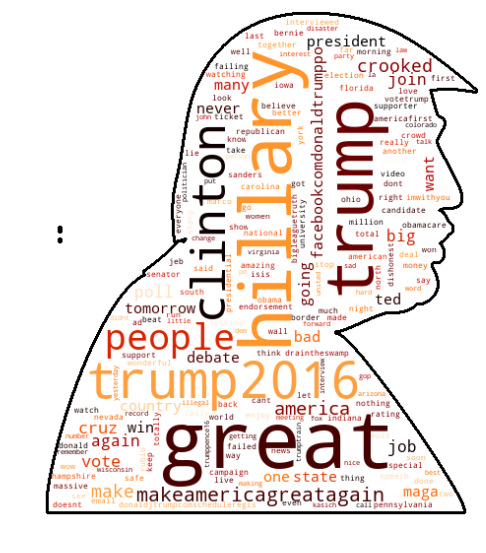

In [7]:
# Create the word cloud
word_cloud_utils.make_word_cloud(tweets, my_stop_words, png_filename=png_filename, image=image)